## NETFLIX STOCK MARKET FORCASTING
### Netflix is one of the Biggest companies that is present in today's time. It comes under the popular FAANG companies and a dream company for many. Everyone loves watch to watch movies and TV-Series on Netflix but the subscription prices are a little too much in my opinion. So why not invest in the company and let your stocks pay for it
### This data set has 7 columns with all the necessary values such as opening price of the stock, the closing price of it, its highest in the day and much more. It has date wise data of the stock starting from 23-May-2002 to 3-Aug-2020.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Dropout

### Loading the data

In [2]:
df = pd.read_csv('NFLX.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200


### EDA and Data Preprocessing

In [3]:
#overall information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4581 entries, 0 to 4580
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4581 non-null   object 
 1   Open       4581 non-null   float64
 2   High       4581 non-null   float64
 3   Low        4581 non-null   float64
 4   Close      4581 non-null   float64
 5   Adj Close  4581 non-null   float64
 6   Volume     4581 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 250.6+ KB


In [4]:
df.duplicated().sum()

0

In [5]:
#statistical summary of the data
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4581.000000,4581.000000,4581.000000,4581.000000,4581.000000,4.581000e+03
mean,78.031471,79.285690,76.736079,78.072056,78.072056,1.760516e+07
std,118.372084,120.276839,116.376768,118.435303,118.435303,1.971130e+07
min,0.377857,0.410714,0.346429,0.372857,0.372857,2.856000e+05
25%,3.778571,3.857143,3.685714,3.784286,3.784286,6.908900e+06
50%,15.392858,15.671429,14.970000,15.324286,15.324286,1.155350e+07
75%,97.830002,99.529999,96.760002,97.889999,97.889999,2.113440e+07
max,567.979980,575.369995,520.960022,548.729980,548.729980,3.234140e+08


In [6]:
df.columns = df.columns.str.lower()

In [7]:
df = df[['date','open','high','low','close']]
df.head()

,date,open,high,low,close
0,2002-05-23,1.156429,1.242857,1.145714,1.196429
1,2002-05-24,1.214286,1.225000,1.197143,1.210000
2,2002-05-28,1.213571,1.232143,1.157143,1.157143
3,2002-05-29,1.164286,1.164286,1.085714,1.103571
4,2002-05-30,1.107857,1.107857,1.071429,1.071429


In [8]:
df.tail()

,date,open,high,low,close
4576,2020-07-28,496.019989,497.790009,487.760010,488.510010
4577,2020-07-29,492.250000,494.920013,484.130005,484.480011
4578,2020-07-30,480.709991,488.350006,477.510010,485.799988
4579,2020-07-31,488.290009,494.799988,484.500000,488.880005
4580,2020-08-03,490.859985,503.089996,490.230011,498.619995


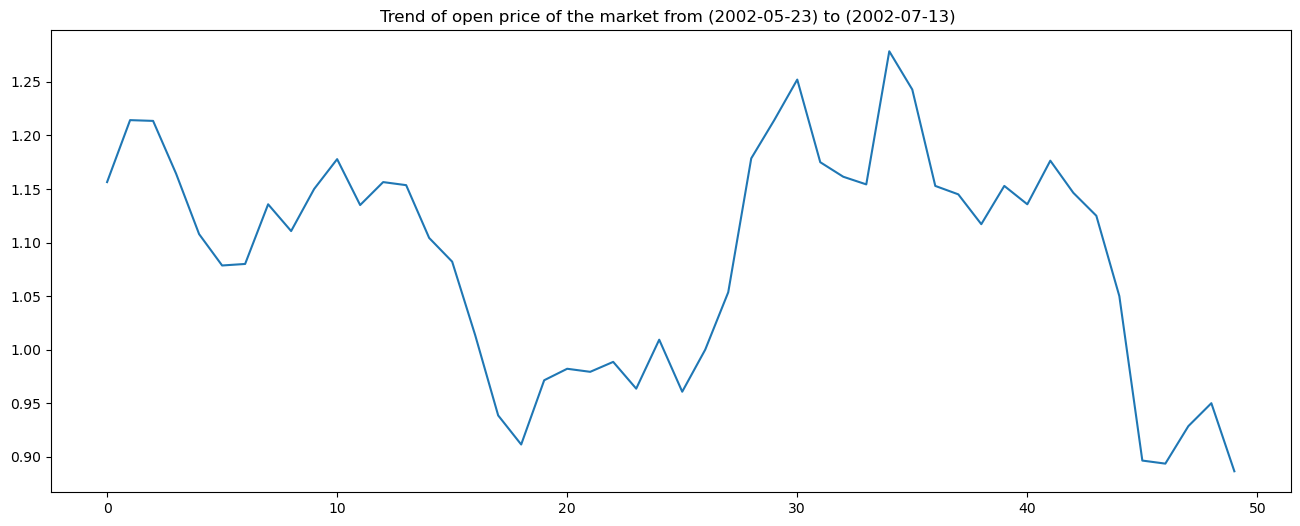

In [9]:
plt.figure(figsize=(16,6))
plt.plot(df.iloc[:50]['open'])
plt.title('Trend of open price of the market from (2002-05-23) to (2002-07-13) ')
plt.show()

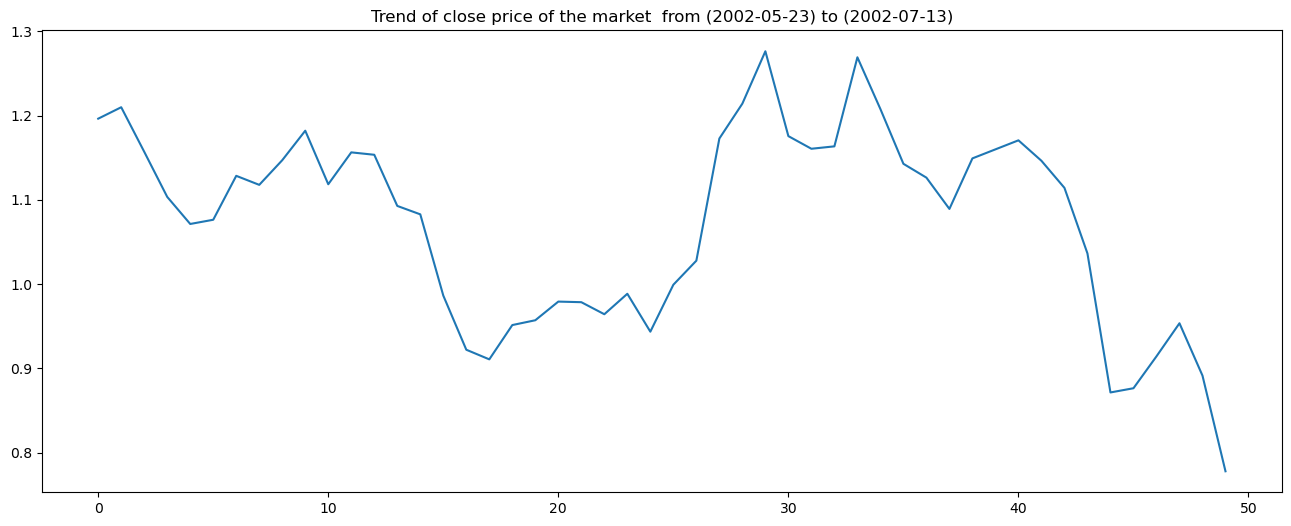

In [10]:
plt.figure(figsize=(16,6))
plt.plot(df.iloc[:50]['close'])
plt.title('Trend of close price of the market  from (2002-05-23) to (2002-07-13)')
plt.show()

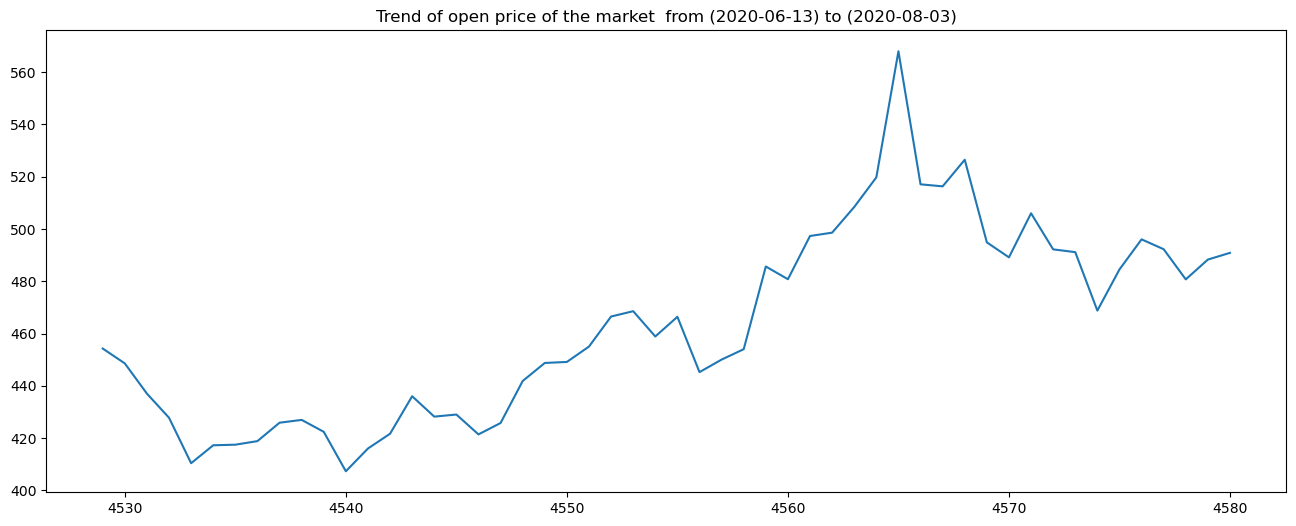

In [11]:
plt.figure(figsize=(16,6))
plt.plot(df.iloc[4529:]['open'])
plt.title('Trend of open price of the market  from (2020-06-13) to (2020-08-03)')
plt.show()

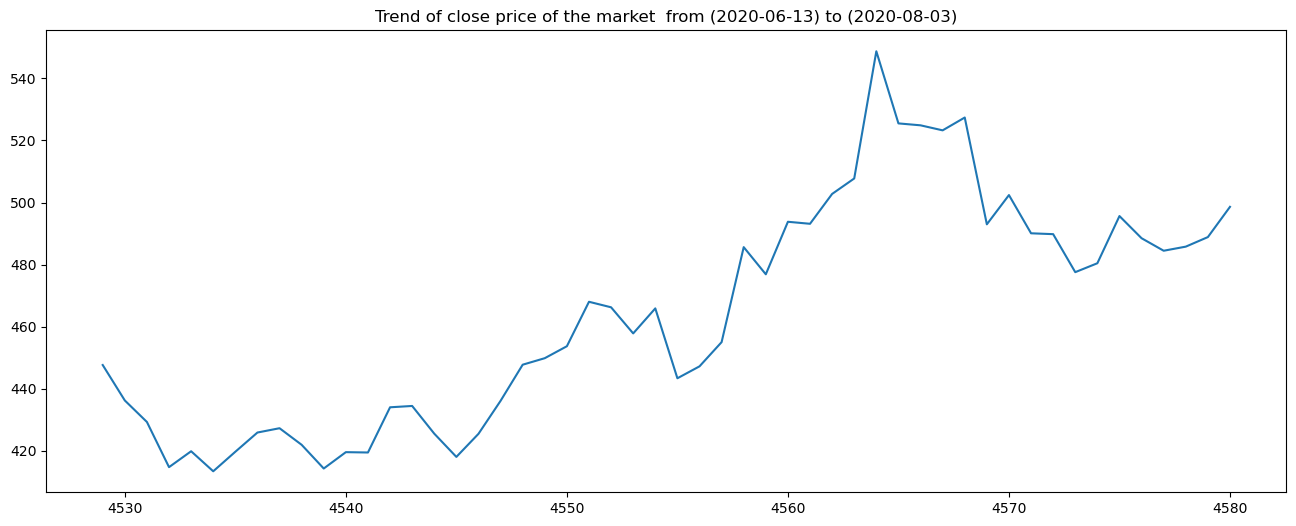

In [12]:
plt.figure(figsize=(16,6))
plt.plot(df.iloc[4529:]['close'])
plt.title('Trend of close price of the market  from (2020-06-13) to (2020-08-03)')
plt.show()

In [13]:
df['date'] = pd.to_datetime(df['date'])

### setting date column as the index

In [14]:
df.set_index('date', inplace=True)
df.head()

,open,high,low,close
date,,,,
2002-05-23,1.156429,1.242857,1.145714,1.196429
2002-05-24,1.214286,1.225000,1.197143,1.210000
2002-05-28,1.213571,1.232143,1.157143,1.157143
2002-05-29,1.164286,1.164286,1.085714,1.103571
2002-05-30,1.107857,1.107857,1.071429,1.071429


### Checking for stationarity in all the columns

In [15]:
def check_stationarity(data):
    result = adfuller(data)
    print(result[0])
    print(f"P-value: {result[1]}")
    print('Critical values')
    for key,value in result[4].items():
        print(key,value)
    if result[1] < 0.05:
        print('STATIONARY')
    else:
        print('NOT STATIONARY')

In [16]:
for col in df.columns:
    print(f'Stationarity check for {col}')
    check_stationarity(df[col])
    print('='*40)

Stationarity check for open
2.126079776444259
P-value: 0.998815959771424
Critical values
1% -3.431788653186758
5% -2.862175715236243
10% -2.5671083943786552
NOT STATIONARY
Stationarity check for high
2.308796242829378
P-value: 0.9989607027356302
Critical values
1% -3.4317883367510076
5% -2.862175575442719
10% -2.5671083199600684
NOT STATIONARY
Stationarity check for low
2.202853750927294
P-value: 0.9988848448868701
Critical values
1% -3.431788653186758
5% -2.862175715236243
10% -2.5671083943786552
NOT STATIONARY
Stationarity check for close
2.15440602703845
P-value: 0.9988428453111282
Critical values
1% -3.431788653186758
5% -2.862175715236243
10% -2.5671083943786552
NOT STATIONARY


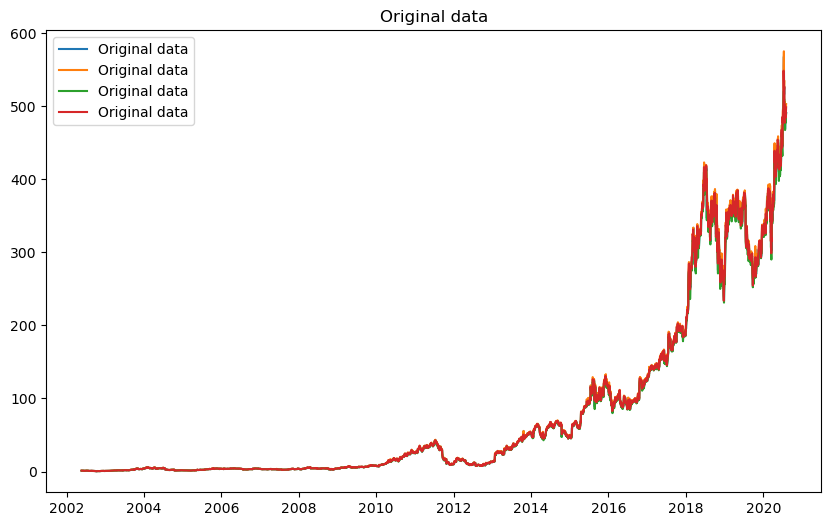

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(df, label='Original data')
plt.title('Original data')
plt.legend()
plt.show()

### Differencing the data to remove stationarity

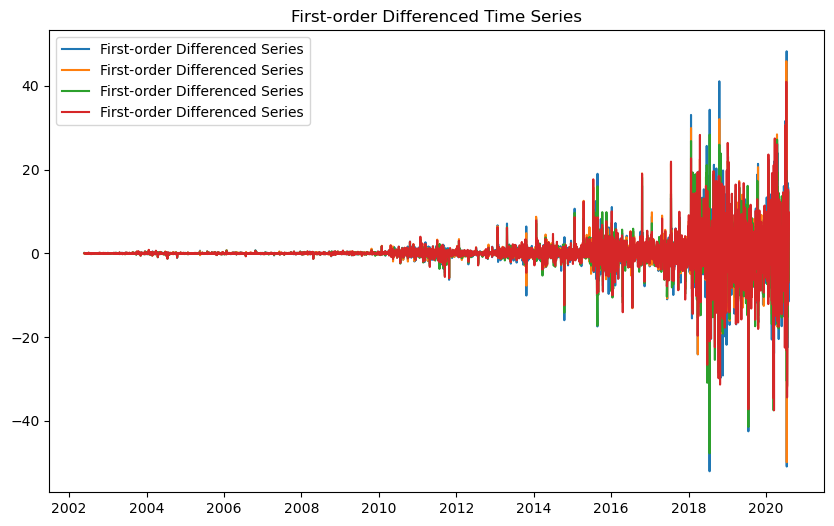

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(df.diff(), label='First-order Differenced Series')
plt.title('First-order Differenced Time Series')
plt.legend()
plt.show()

In [19]:
new_df = df.diff().dropna()

In [20]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4580 entries, 2002-05-24 to 2020-08-03
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    4580 non-null   float64
 1   high    4580 non-null   float64
 2   low     4580 non-null   float64
 3   close   4580 non-null   float64
dtypes: float64(4)
memory usage: 178.9 KB


### Creating input and output sequence,we will use the past 7 days to forcast the next 3 days for each and every column

In [21]:
def convert_to_sequence(data,n_past,n_future):
    x = list()
    y = list()
    for i in range(len(data)):
        end_seq = i + n_past
        out_end_seq = end_seq + n_future
        if out_end_seq > len(data):
            break
        seq_x,seq_y = data[i:end_seq,:], data[end_seq:out_end_seq,:]
        x.append(seq_x)
        y.append(seq_y)
        
    return np.array(x),np.array(y)

In [22]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import TimeDistributed,RepeatVector

### Data scaling

In [23]:
scaler = MinMaxScaler(feature_range = (0,1))
new_df = scaler.fit_transform(df[['open','high','low','close']])

In [25]:
X,y = convert_to_sequence(new_df,7,3)

In [26]:
X.shape

(4572, 7, 4)

In [27]:
y.shape

(4572, 3, 4)

### splitting into train and test set

In [28]:
X_train = X[:3434]
y_train = y[:3434]
X_test = X[3434:]
y_test = y[3434:]

## There are two key points to remember when using the TimeDistributed wrapper layer:

### The input must be (at least) 3D. This often means that you will need to configure your last LSTM layer prior to your TimeDistributed wrapped Dense layer to return sequences (e.g. set the “return_sequences” argument to “True”).
### The output will be 3D. This means that if your TimeDistributed wrapped Dense layer is your output layer and you are predicting a sequence, you will need to resize your y array into a 3D vect

In [29]:
n_past = 7
n_future = 3
model = Sequential([
    LSTM(200,activation='relu',input_shape=(n_past,4)),
    RepeatVector(n_future),
    LSTM(200,activation='relu',return_sequences=True),
    TimeDistributed(Dense(4)) # wrap a fully connected Dense layer with a single output..
])

In [30]:
model.compile(optimizer = 'adam',loss='mse',metrics=['accuracy'])

In [31]:
history = model.fit(X_train,y_train,epochs = 10,batch_size=32)

Epoch 1/10


108/108 [==============================] - 7s 22ms/step - loss: 5.4929e-04 - accuracy: 0.6048
Epoch 2/10
108/108 [==============================] - 2s 22ms/step - loss: 2.3395e-05 - accuracy: 0.6738
Epoch 3/10
108/108 [==============================] - 2s 22ms/step - loss: 1.9693e-05 - accuracy: 0.7368
Epoch 4/10
108/108 [==============================] - 2s 22ms/step - loss: 1.9933e-05 - accuracy: 0.7391
Epoch 5/10
108/108 [==============================] - 2s 22ms/step - loss: 1.8339e-05 - accuracy: 0.7297
Epoch 6/10
108/108 [==============================] - 2s 22ms/step - loss: 2.0330e-05 - accuracy: 0.7121
Epoch 7/10
108/108 [==============================] - 2s 22ms/step - loss: 1.9091e-05 - accuracy: 0.7136
Epoch 8/10
108/108 [==============================] - 2s 23ms/step - loss: 1.8687e-05 - accuracy: 0.7361
Epoch 9/10
108/108 [==============================] - 2s 22ms/step - loss: 1.8185e-05 - accuracy: 0.7442
Epoch 10/10
108/108 [==============================] 

In [32]:
model.evaluate(X_test,y_test)

36/36 [==============================] - 1s 7ms/step - loss: 0.0015 - accuracy: 0.6031


[0.0014509177999570966, 0.6031048893928528]

In [33]:
pred = model.predict(X_test)

36/36 [==============================] - 1s 7ms/step


In [34]:
pred

array([[[0.18542556, 0.18698558, 0.19709913, 0.19220118],
        [0.18540497, 0.18670538, 0.1977097 , 0.19259323],
        [0.18576825, 0.1873287 , 0.19899552, 0.19316669]],

       [[0.18276437, 0.18425494, 0.19430274, 0.1894153 ],
        [0.18281601, 0.18402661, 0.19496208, 0.18988228],
        [0.18315187, 0.18459457, 0.1961982 , 0.19043998]],

       [[0.18036216, 0.1818183 , 0.19178158, 0.1869095 ],
        [0.18046877, 0.18164319, 0.19247766, 0.18743996],
        [0.18077384, 0.18217246, 0.19366696, 0.1879857 ]],

       ...,

       [[0.9393152 , 1.0084064 , 0.99187803, 1.0170144 ],
        [0.75844747, 0.8263913 , 0.79744667, 0.8162617 ],
        [0.811516  , 0.9014561 , 0.8613493 , 0.88415056]],

       [[0.9407048 , 1.0099123 , 0.99331564, 1.0185542 ],
        [0.7593838 , 0.8274064 , 0.7983849 , 0.81730443],
        [0.8127274 , 0.9027313 , 0.86254424, 0.8854942 ]],

       [[0.93873405, 1.0076755 , 0.9912351 , 1.0164025 ],
        [0.7581808 , 0.8259738 , 0.79715896, 0.81

In [35]:
pred.shape

(1138, 3, 4)

In [36]:
y_test

array([[[0.17512645, 0.17787222, 0.1894948 , 0.18007817],
        [0.17505597, 0.17416762, 0.18152344, 0.17772568],
        [0.16954155, 0.16947163, 0.17334078, 0.16554384]],

       [[0.17505597, 0.17416762, 0.18152344, 0.17772568],
        [0.16954155, 0.16947163, 0.17334078, 0.16554384],
        [0.16466136, 0.16494957, 0.1724188 , 0.17148888]],

       [[0.16954155, 0.16947163, 0.17334078, 0.16554384],
        [0.16466136, 0.16494957, 0.1724188 , 0.17148888],
        [0.16141966, 0.16345381, 0.17341762, 0.16680214]],

       ...,

       [[0.87322107, 0.86506873, 0.93622907, 0.89018111],
        [0.86657911, 0.86007708, 0.92925652, 0.88283189],
        [0.84624795, 0.84865017, 0.91654077, 0.88523904]],

       [[0.86657911, 0.86007708, 0.92925652, 0.88283189],
        [0.84624795, 0.84865017, 0.91654077, 0.88523904],
        [0.85960241, 0.85986833, 0.92996721, 0.89085584]],

       [[0.84624795, 0.84865017, 0.91654077, 0.88523904],
        [0.85960241, 0.85986833, 0.92996721, 0.89

In [37]:
y_test.shape

(1138, 3, 4)

In [38]:
from sklearn.metrics import mean_squared_error
pred_reshaped = pred.reshape(-1, pred.shape[-1])
y_test_reshaped = y_test.reshape(-1, y_test.shape[-1])

mse_per_feature = []
for i in range(pred.shape[-1]):
    mse = mean_squared_error(y_test_reshaped[:, i], pred_reshaped[:, i])
    mse_per_feature.append(mse)
    print(f'MSE for feature {i}: {mse}')

MSE for feature 0: 0.0013276939233719648
MSE for feature 1: 0.0013026101286601837
MSE for feature 2: 0.0017617667390273266
MSE for feature 3: 0.0014116003684713746


### scaler.inverse_transform(X) X = array of shape(samples,n_features)

In [39]:
predictions_reshaped = pred.reshape(-1, pred.shape[-1])
predictions_reshaped.shape

(3414, 4)

In [40]:
predictions = scaler.inverse_transform(predictions_reshaped)

In [41]:
y_test_reshaped = y_test.reshape(-1,y_test.shape[-1])

In [42]:
true_values = scaler.inverse_transform(y_test_reshaped)

In [43]:
predictions.shape

(3414, 4)

### Converting to original shape after inverse transform

In [44]:
predictions = predictions.reshape(pred.shape)
y_test = true_values.reshape(y_test.shape)

In [45]:
index = pd.MultiIndex.from_product(
    [range(pred.shape[0]), range(pred.shape[1])],
    names=['sample', 'timestep']
)

In [46]:
columns = ['open','high','low','close']
predicted_df = pd.DataFrame(predictions.reshape(-1, pred.shape[-1]), index=index, columns=columns)

In [47]:
predicted_df.head()

open        high         low       close
sample timestep                                                
0      0         105.625801  107.919807  102.958916  105.767746
       1         105.614113  107.758705  103.276787  105.982727
       2         105.820312  108.117081  103.946198  106.297188
1      0         104.115303  106.349800  101.503075  104.240089
       1         104.144615  106.218521  101.846344  104.496155

In [48]:
index2 = pd.MultiIndex.from_product(
    [range(y_test.shape[0]), range(y_test.shape[1])],
    names=['sample', 'timestep']
)

In [49]:
y_test_df = pd.DataFrame(y_test.reshape(-1, y_test.shape[-1]), index=index2, columns=columns)

In [50]:
y_test_df.head()

open        high        low      close
sample timestep                                             
0      0         99.779999  102.680000  99.000000  99.120003
       1         99.739998  100.550003  94.849998  97.830002
       2         96.610001   97.849998  90.589996  91.150002
1      0         99.739998  100.550003  94.849998  97.830002
       1         96.610001   97.849998  90.589996  91.150002

In [51]:
original_df = pd.read_csv('NFLX.csv')

In [52]:
original_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200


In [54]:
list(original_df.iloc[4574:,1].values)

[468.769989, 484.51001, 496.019989, 492.25, 480.709991, 488.290009, 490.859985]

In [55]:
user_open = list(original_df.iloc[4574:,1].values)
user_high = list(original_df.iloc[4574:,2].values)
user_low = list(original_df.iloc[4574:,3].values)
user_close = list(original_df.iloc[4574:,4].values)

In [56]:
print(user_close)

[480.450012, 495.649994, 488.51001, 484.480011, 485.799988, 488.880005, 498.619995]


In [57]:
x = np.array([user_open,user_high,user_low,user_close])

In [60]:
x = x.reshape((1,7,4))

In [61]:
y_hat = model.predict(x)

1/1 [==============================] - 0s 128ms/step


In [63]:
forc = y_hat.reshape(3,4)

In [65]:
from datetime import datetime
start_date = datetime(2020,8, 4)  
end_date = datetime(2020, 8, 6)
date_range = pd.date_range(start=start_date, end=end_date)
forcast = pd.DataFrame(forc, columns=['open','high','low','close'],index = date_range)

In [66]:
forcast.head()

,open,high,low,close
2020-08-04,667.540222,939.088501,619.860840,785.056885
2020-08-05,139.714813,437.542419,181.494278,51.761383
2020-08-06,590.668579,1091.486450,487.807648,663.135803
